<a href="https://colab.research.google.com/github/cram05/practicas-machine-learning/blob/main/CRamos_Redes_neuronales%2C_perceptr%C3%B3n_multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RN: Perceptrón Multicapa

__Club de Ciencia de Datos Cochabamba__

In [ ]:
# Importar librerias

# Librerias para cargar el conjunto de datos
from google.colab import files
import io

# Librerias para la implementación
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

## 1. Implementación

### Funciones Auxiliares

In [ ]:
# Función de costo
def L(Y, p):
    Loss = -np.sum(Y*np.log(p))
    return(Loss)

In [ ]:
# Función softmax
def softmax(Z):
  K = Z.shape[1]
  n = Z.shape[0]
  num = np.exp(Z)
  den = np.tile(np.sum(np.exp(Z),axis=1).reshape((n,1)),K)
  p=num/den
  return(p)

In [ ]:
# Función sigmoide
def sigmoid(Z):
    p = 1/(1+np.exp(-Z))
    return(p)

In [ ]:
# Derivada de la función sigmoide
def d_sigmoid(Z):
    d_sig = sigmoid(Z)*(1-sigmoid(Z))
    return(d_sig)

### Forward and Backward

In [ ]:
def forward(Y, X, theta):

    # Calcular unidades ocultas
    W1 = theta[0][0]
    b1 = theta[0][1]
    Z1 = X.dot(W1)+b1

    Z1p = sigmoid(Z1)

    # Calcular estimadores
    Ws = theta[1][0]
    bs = theta[1][1]
    Zs = Z1p.dot(Ws)+bs
    Y_hat = softmax(Zs)

    # Calcular costo
    costo = L(Y, Y_hat)

    return(Y_hat, Z1, Z1p, Zs, costo)

In [ ]:
def backward(Y, Y_hat, Zs, theta):

    K = Y.shape[1]

    # Calcular medida de error en la capa externa
    delta_s = -(Y-Y_hat)

    # Calcular medida de error en la capa oculta
    Ws = theta[1][0]
    delta_1 = delta_s.dot(Ws.T)

    return(delta_1, delta_s)

### Backpropagation

In [ ]:
# Gradient Descent for NN
def gradient_descent(Y, X, theta_0, alpha=0.0001, epocs=1000):

    # Pesos iniciales
    theta = theta_0.copy()
    Ws = theta[1][0]
    bs = theta[1][1]
    W1 = theta[0][0]
    b1 = theta[0][1]

    # Definir historial de costos
    costos = []
    costo = forward(Y, X, theta)[4]
    costos.append(float(costo))

    for i in range(epocs):

      #**********************************************************
      #                   Calcular gradientes
      #**********************************************************

      # Forward step
      Y_hat, Z1, Z1p, Zs, costo = forward(Y, X, theta)

      # Backward step
      delta_1, delta_s = backward(Y, Y_hat, Zs, theta)

      gradiente_Ws = Z1p.T.dot(delta_s)
      gradiente_bs = np.sum(delta_s,axis=0)
      gradiente_W1 = X.T.dot(d_sigmoid(Z1)*delta_1)
      gradiente_b1 = np.sum(delta_1,axis=0)

      #**********************************************************

      # Actualizar pesos
      Ws = Ws - alpha*gradiente_Ws
      bs = bs - alpha*gradiente_bs
      W1 = W1 - alpha*gradiente_W1
      b1 = b1 - alpha*gradiente_b1

      theta = [(W1,b1),(Ws,bs)]

      # Actualizar historial
      costos.append(float(costo))

    # Graficar evolución del costo
    plt.plot(costos)

    return(theta, costos)

##Ejemplo numérico

### Lectura de datos

In [ ]:
uploaded = files.upload()

Saving newthyroid.csv to newthyroid.csv


In [ ]:
# Lectura de datos
thyroids = pd.read_csv(io.StringIO(uploaded['newthyroid.csv'].decode('utf-8')))
thyroids.head()

,T3resin,Thyroxin,Triiodothyronine,Thyroidstimulating,TSH_value,Class
0,107,10.1,2.2,0.9,2.7,1
1,113,9.9,3.1,2.0,5.9,1
2,127,12.9,2.4,1.4,0.6,1
3,109,5.3,1.6,1.4,1.5,1
4,105,7.3,1.5,1.5,-0.1,1


In [ ]:
# Renombrar columnas
thyroids.columns = ['T3','TRX','TRI','TRS','TSH','Tipo']


### Preprocesamiento

In [ ]:
# Número de observaciones
n = thyroids.shape[0]

# Definir matriz de datos
X_data = thyroids.loc[:,['T3','TRX','TRI','TRS','TSH']]
Z_data = preprocessing.scale(X_data)

Z = Z_data

In [ ]:
# Definir variable de respuesta
y = np.array(thyroids.loc[:,['Tipo']])

# Transformar y a la amtriz Y (Binarización)
binarizer = preprocessing.LabelBinarizer()
binarizer.fit((1,2,3))

Y = binarizer.transform(y)

In [ ]:
Y.shape

(215, 3)

### Uso de implementación propia

In [ ]:
W1 = np.random.uniform(-0.7,0.7,(5,10))
b1 = np.random.uniform(-0.7,0.7,(1,10))
Ws = np.random.uniform(-0.7,0.7,(10,3))
bs = np.random.uniform(-0.7,0.7,(1,3))

theta_0 = [(W1,b1),(Ws,bs)]
theta_0

[(array([[-0.21679849,  0.67025965,  0.41010914,  0.48496535, -0.13376766,
           0.52765318,  0.34060307,  0.54819073,  0.51229188,  0.35889414],
         [ 0.1557292 ,  0.56610018,  0.00649986,  0.69131209,  0.41514403,
           0.61497875, -0.54210116,  0.35740005, -0.67704758,  0.41646437],
         [ 0.61678805,  0.53696644, -0.18530527,  0.37087319, -0.45084369,
          -0.58249608,  0.60243144, -0.67414668,  0.5012172 ,  0.65436167],
         [ 0.05508553,  0.104952  ,  0.46500286, -0.67806226, -0.07387156,
          -0.24483913, -0.47385599,  0.22366074, -0.29380446, -0.69137206],
         [ 0.31192203,  0.26641933,  0.6790091 ,  0.12972433,  0.27722239,
           0.21225096, -0.2226297 , -0.03324033,  0.68491932, -0.51283233]]),
  array([[-0.36273851, -0.16316647,  0.11844479,  0.04699896,  0.57930286,
           0.27416005,  0.15806203,  0.37483572, -0.34020802, -0.63080904]])),
 (array([[-0.53018852, -0.49844698, -0.04574244],
         [-0.22053122, -0.20963951,  0.

In [ ]:
# Prueba forward
Y_hat, Z1, Z1p, Zs, costo = forward(Y, Z, theta_0)

In [ ]:
Y_hat.shape, Z1.shape, Z1p.shape, Zs.shape, costo.shape

((215, 3), (215, 10), (215, 10), (215, 3), ())

In [ ]:
costo

221.12641138844833

In [ ]:
# Prueba backward
delta_1, delta_s = backward(Y, Y_hat, Zs, theta_0, )

In [ ]:
delta_1.shape, delta_s.shape

((215, 10), (215, 3))

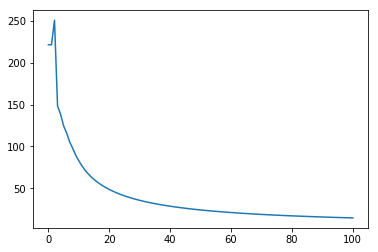

In [ ]:
# Estimación de parámetros por gradient descent
theta_gd, costo_gd = gradient_descent(Y, Z, theta_0, alpha=0.01, epocs=100)

In [ ]:
Y_hat, Z1, Z1p, Zs, costo_gd = forward(Y, Z, theta_gd)

In [ ]:
Y_hat.round(2)[:10,:]

array([[0.98, 0.02, 0.  ],
       [0.96, 0.04, 0.01],
       [0.98, 0.02, 0.  ],
       [0.91, 0.  , 0.09],
       [0.99, 0.  , 0.01],
       [0.78, 0.  , 0.22],
       [0.99, 0.  , 0.  ],
       [0.99, 0.01, 0.01],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ]])

In [ ]:
np.argmax(Y_hat,1)+1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1])

In [ ]:
mc = confusion_matrix(np.argmax(Y_hat,1)+1, y)
mc

array([[149,   1,   2],
       [  1,  34,   0],
       [  0,   0,  28]])

In [ ]:
# Tasa de clasificación erronea
(1-np.diag(mc).sum()/len(y))*100

1.8604651162790753

### Uso de sklearn

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nn_sk = MLPClassifier(activation = 'logistic',
                      hidden_layer_sizes=(10),
                      random_state=1,
                      learning_rate_init = 0.01,
                      max_iter = 100
                     )

In [ ]:
nn_sk.fit(Z, np.ravel(y))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.01, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
mc = confusion_matrix(nn_sk.predict(Z),y)
mc

array([[150,   3,   4],
       [  0,  32,   0],
       [  0,   0,  26]])

In [ ]:
# Tasa de clasificación erronea
(1-np.diag(mc).sum()/len(y))*100

3.2558139534883734

## Ejercicio

Usando sklearn, entrenar redes neuronales de una sola capa oculta haciendo variar el nùmero de unidades ocultas de uno a cien. Evaluar y graficar las tasas erroneas de clasificación respecto al número de capas ocultas. Mantener los siguientes hiperparámetros: `learning_rate_init = 0.001`;  `max_iter = 100`.






In [ ]:
TEC = []
for m1 in np.arange(1,100):
  # Completa el código
  nn_sk = MLPClassifier(activation = 'logistic',
                      hidden_layer_sizes=(m1),
                      random_state=1,
                      learning_rate_init = 0.001,
                      max_iter = 100
                     )
  nn_sk.fit(Z, np.ravel(y))
  mc = confusion_matrix(nn_sk.predict(Z),y)
  # Tasa de clasificación erronea
  t = (1-np.diag(mc).sum()/len(y))*100
  TEC.append(t)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

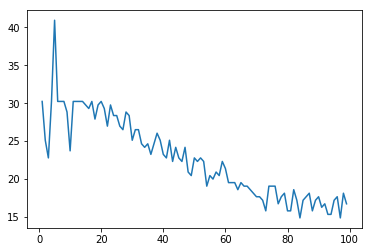

In [ ]:
plt.plot(np.arange(1,100), TEC)